In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

In [2]:
u_gust = pd.read_csv('data/climatology_dm_winter_per_cluster/EVENT_max/max_event_dm_combined.csv')
z_gust = pd.read_csv('data/climatology_dm_winter_per_cluster/GEV_CDF_max/log_cdf_max_dm_combined.csv')

### Trend of each cluster depending on the target

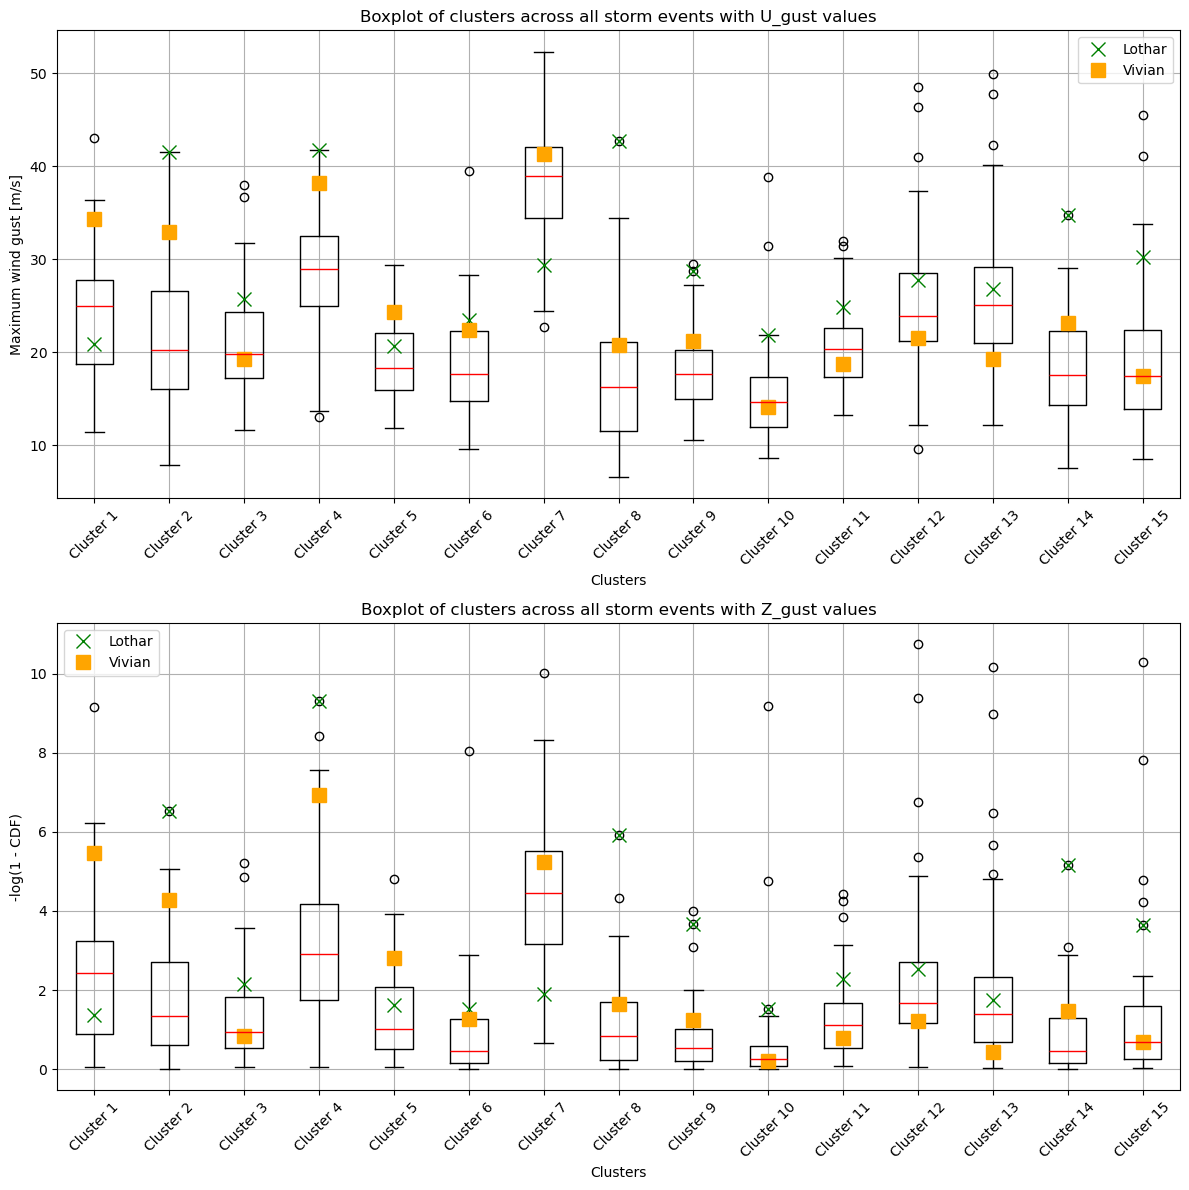

In [4]:
# Extract columns that start with 'cluster'
cluster_columns = [col for col in u_gust.columns if col.startswith('cluster')]
cluster_numbers = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
                   'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10',
                   'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',]

lothar_u_values = [u_gust.loc[u_gust['storm_name'] == 'LOTHAR', col].values[0] for col in cluster_columns]
lothar_z_values = [z_gust.loc[z_gust['storm_name'] == 'LOTHAR', col].values[0] for col in cluster_columns]

vivian_u_values = [u_gust.loc[u_gust['storm_name'] == 'VIVIAN', col].values[0] for col in cluster_columns]
vivian_z_values = [z_gust.loc[z_gust['storm_name'] == 'VIVIAN', col].values[0] for col in cluster_columns]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # Two subplots horizontally

# Plot boxplot for `u_gust`
axes[0].boxplot([u_gust[col] for col in cluster_columns], labels=cluster_columns, medianprops = dict(color='red'))
axes[0].plot(range(1, len(cluster_columns) + 1), lothar_u_values, color='green', marker='x', markersize=10, label='Lothar', linestyle='none')
axes[0].plot(range(1, len(cluster_columns) + 1), vivian_u_values, color='orange', marker='s', markersize=10, label='Vivian', linestyle='none')
axes[0].set_title('Boxplot of clusters across all storm events with U_gust values')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('Maximum wind gust [m/s]')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid()
axes[0].legend()
axes[0].set_xticklabels(cluster_numbers)

# Plot boxplot for `z_gust`
axes[1].boxplot([z_gust[col] for col in cluster_columns], labels=cluster_columns, medianprops = dict(color='red'))
axes[1].plot(range(1, len(cluster_columns) + 1), lothar_z_values, color='green', marker='x', markersize=10, label='Lothar', linestyle='none')
axes[1].plot(range(1, len(cluster_columns) + 1), vivian_z_values, color='orange', marker='s', markersize=10, label='Vivian', linestyle='none')
axes[1].set_title('Boxplot of clusters across all storm events with Z_gust values')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('-log(1 - CDF)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid()
axes[1].legend()
axes[1].set_xticklabels(cluster_numbers)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('figures/outputs/boxplot_clusters.png')
plt.show()